In [54]:
import numpy as np
from scipy.stats import ttest_ind, t
import matplotlib.pyplot as plt
from scipy import stats

___

## Задание 1: t-test для независимых выборок (критерий Уэлча)
### Реализуйте тест Уэлча на python. 
Для двух независимых выборок напишите функцию, которая возвращает значение t-статистики. Функция должна принимать на вход два массива, а возвращать значение t-статистики. В описании функции укажите статистическую гипотезу, для которой применяется критерий Уэлча.

P.s. Использовать ttest_ind запрещено

___

In [ ]:
def t_stat(n, m):
    """
    Функция, вычисляющая t-статистику для двух независимых выборок n и m. Использует критерий Уэлча.
    Статистическая гипотеза, для которой применяется критерий Уэлча: H_0: mean_n = mean_m (альтернативная гипотеза H_1: mean_n != mean_m),
    где mean_n и mean_m - средние значения n и m соответственно.
    """
    n = np.array(n)
    m = np.array(m)
    mean_m = np.mean(m)
    mean_n = np.mean(n)
    var_m = np.var(m, ddof=1)
    var_n = np.var(n, ddof=1)
    se = np.sqrt(var_n/len(n) + var_m/len(m))
    t_statistics = (mean_n - mean_m) / se
    return t_statistics

## Задание 2: Распределение t-статистики
### Используя метод Монте-Карло, постройте гистограмму распределения t-статистики для двух случаев:
1. Выборки взяты из одного равномерного распределения с параметрами a = 400, b = 2000. 
2. Выборки взяты из разных нормальных распределений. Параметры распределений: mu_1 = 1210, sigma_1 = 500, mu_2 = 1200, sigma_2 = 350.

Для построения гистограмы будет достаточно выборок объёмом в 10000 наблюдений каждая.

Используйте функцию из задания 1

___

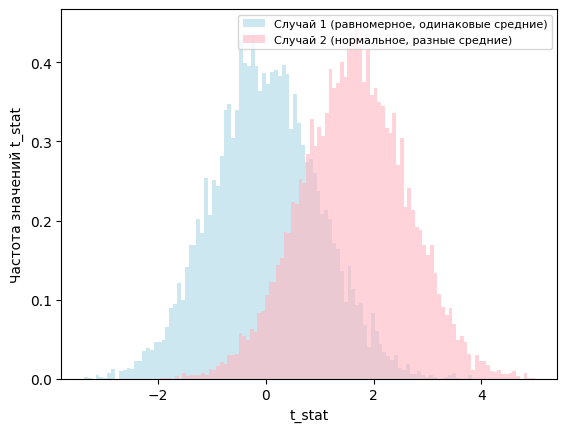

In [4]:
r = 10000
t_values_1 = np.empty(r)
for i in range(r):
    n = np.random.uniform(low=400, high=2000, size=10000)
    m = np.random.uniform(low=400, high=2000, size=10000)
    t_values_1[i] = t_stat(n, m)

t_values_2 = np.empty(r)
for i in range(r):
    n = np.random.normal(loc=1210, scale=500, size=10000)
    m = np.random.normal(loc=1200, scale=350, size=10000)
    t_values_2[i] = t_stat(n, m)

plt.hist(t_values_1, bins=100, density=True, alpha=0.6, label="Случай 1 (равномерное, одинаковые средние)", color='lightblue')
plt.hist(t_values_2, bins=100, density=True, alpha=0.6, label="Случай 2 (нормальное, разные средние)", color='lightpink')
plt.xlabel("t_stat")
plt.ylabel("Частота значений t_stat")
plt.legend(fontsize=8)
plt.show()

## Задание 3: Связь t-распределения стьюдента с нормальным распределением
Распределение Стьюдента является однопараметрическим и зависит от n, числа случайных величин (т.е. от объёма выборки). Для случая (1) из задания 2 постройте несколько разных распределений t-статистики для выборок объёма 50, 1000 и 10000 элементов. Сравните полученные распределения с нормальным распределением, какими параметрами оно должно обладать?

Для расчета t-статистики используйте функцию из задания 1

___

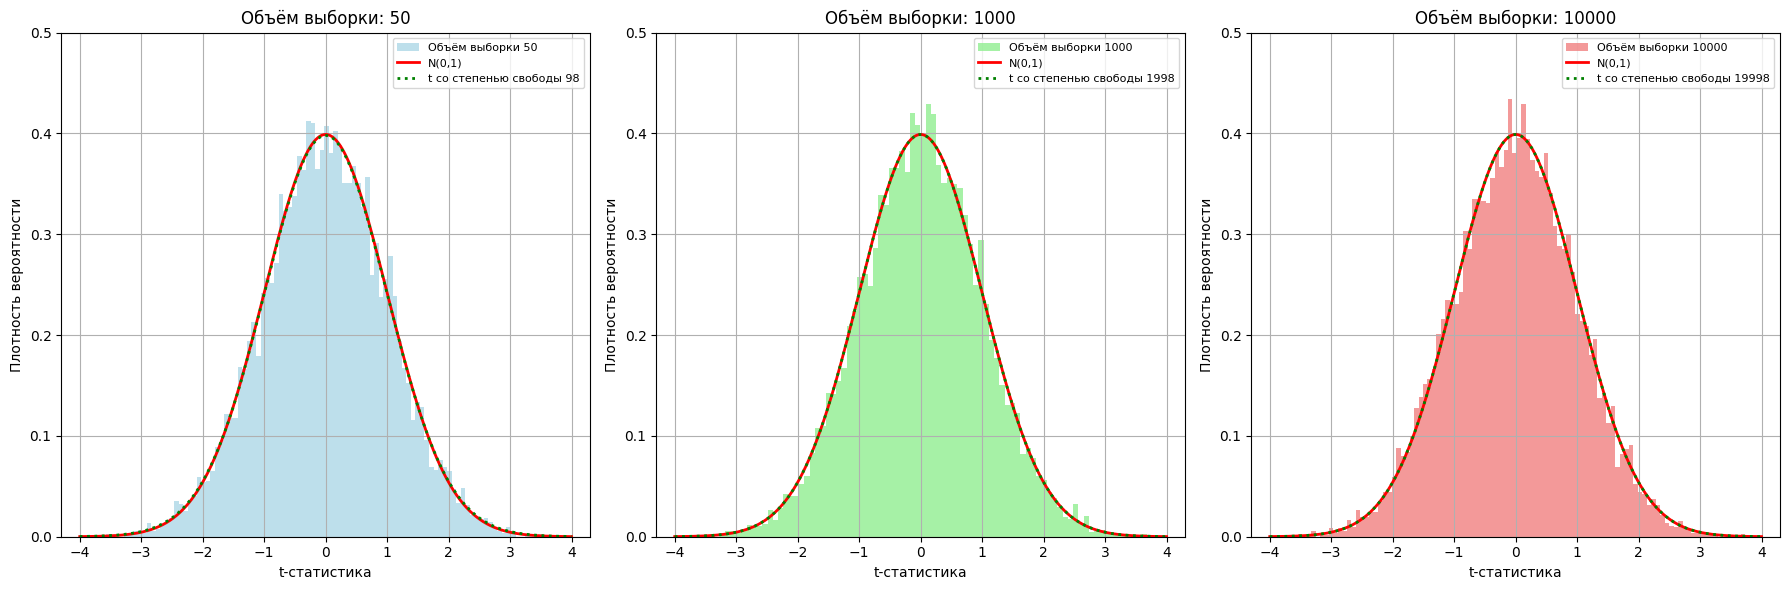

In [100]:
import scipy

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral']
sizes = [50, 1000, 10000]
r = 10000
x = np.linspace(-4, 4, 1000)

for i in range(3):
    size = sizes[i]
    color = colors[i]
    t_values = np.empty(r)
    for j in range(r):
        n = np.random.uniform(low=400, high=2000, size=size)
        m = np.random.uniform(low=400, high=2000, size=size)
        t_values[j] = t_stat(n, m)

    axs[i].hist(t_values, bins=100, density=True, alpha=0.8, label=f"Объём выборки {size}", color=color)
    axs[i].plot(x, scipy.stats.norm.pdf(x, loc=0, scale=1), 'r', linewidth=2, label='N(0,1)')
    df = 2 * size - 2
    axs[i].plot(x, scipy.stats.t.pdf(x, df), 'g:', linewidth=2, label=f't со степенью свободы {df}')
    axs[i].set_xlabel("t-статистика")
    axs[i].set_ylabel("Плотность вероятности")
    axs[i].set_title(f"Объём выборки: {size}")
    axs[i].set_xlim(-4.3, 4.3)
    axs[i].set_ylim(0, 0.5)
    axs[i].legend(fontsize=8)
    axs[i].grid()

plt.tight_layout()
plt.show()


Внимательно посмотрев на графики, можно понять, что t-распределение Стьюдента очень похоже на нормальное распределение. Разницу невооружённым глазом можно заметить разве что на графике с $r=50$ (r - объём выборки), там чуть более "тяжёлые" хвосты у кривой, показывающей плотность распределения Стьюдента, относительно нормального распределения. В задании этого не было сказано, но если вывести тот же эксперимент при объёме выборок, не превышающем 10, "тяжесть" хвостов распределения Стьюдента (и, соответственно, гистограммы) будет гораздо заметнее. 

Параметры нормального распределения $N(\mu, \sigma)$, к которому сходится распределение Стьюдента при $n \rightarrow \infty$: $\mu = 0, \sigma=1$

## Задание 4: Расчёт p-value на основе знания t-статистики
Для случая (2) из задания 2 с выборками объёмом в 10000 элементов посчитайте значение t-статистики. Вычислите значение p-value для получившегося значения t-статистики.

Добавьте в функцию реализации теста Уэлча из задания 1 расчёт p-value на основе рассчитанного значения t-статистики. Функция должна принимать на вход два массива, а возвращать значения t-статистики и p-value для двусторонней альтернативной гипотезы. Текстом напишите ответ на вопрос: как будет отличаться p-value для односторонней и двусторонней альтернативной гипотезы?

___

In [59]:
def t_p_stat(n, m):
    n = np.array(n)
    m = np.array(m)
    mean_m = np.mean(m)
    mean_n = np.mean(n)
    var_m = np.var(m, ddof=1)
    var_n = np.var(n, ddof=1)
    se = np.sqrt(var_n/len(n) + var_m/len(m))
    t_value = (mean_n - mean_m) / se

    p_value = 2 * (1- t.cdf(np.abs(t_value), df=len(n) + len(m) - 2))
    return t_value, p_value

n = np.random.normal(loc=1210, scale=500, size=10000)
m = np.random.normal(loc=1200, scale=350, size=10000)
t, p = t_p_stat(n, m)
print("T-value:", t)
print("P-value:", p)

T-value: -0.42680573849503556
P-value: 0.6695254209736989


В задании мы уже написанной ранее функцией получили значение t_value. Теперь хотим понять, какова вероятность получить такие же или более экстремальные результаты (потому что это и есть определение p_value), а так как t_value имеет распределение Стьюдента, нам достаточно взять t.cdf от полученного значения с корректно заданной степенью свободы.

- p_value для односторонней (правосторонней) гипотезы: $p\_value = P(T \geq t) = 1 - F(t)$
- p_value для односторонней (левосторонней) гипотезы: $p\_value = P(T \leq t) = F(t)$
- p_value для двусторонней гипотезы: $p\_value = 2 \cdot P(T \geq |t|) = 2 \cdot (1 - F(|t|))$

А ещё у нас в вузе чаще говорили: $p = 2min(p_l, p_r)$. Но, на мой взгляд, проще воспринимать то, что написано выше :)

## Задание 5: Применение t_test_ind из scipy. Метод 1000 тестов.
1. Для случаев (1) и (2) из задания 2 примените вашу функцию для вычисления результатов t-test и функцию ttest_ind из scipy. Сравните результаты.
2. Для случая (1) из задания 2 примените метод Монте-Карло с имитацией 1000 А/А-тестов и постройте распределение p-value. Опишите, какое распределение вы получили?

___

Давайте сравним сначала значения. Они получились равны с точностью до всех выведенных после запятой знаков. Затем посмотрим на гистограммы (так как выводить 5000 значений очень не хочется). Они получились в точности наложением гистограммы моей функции и функции из scipy, что подтвержает, что методы работают идентично.

Случай 1
    Моя функция     Scipy
0    -0.665610 -0.665610
1    -1.023823 -1.023823
2     0.894180  0.894180
3     0.841525  0.841525
4     1.042973  1.042973
Случай 2
    Моя функция     Scipy
0     2.274767  2.274767
1     2.931788  2.931788
2     1.159308  1.159308
3     1.045187  1.045187
4     1.180086  1.180086


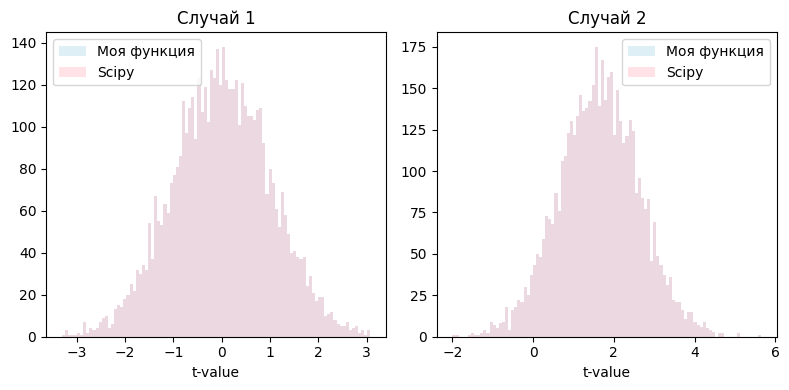

In [66]:
import pandas as pd


r = 5000
t_values_1 = np.empty(r)
t_values_scipy_1 = np.empty(r)
for i in range(r):
    n = np.random.uniform(low=400, high=2000, size=10000)
    m = np.random.uniform(low=400, high=2000, size=10000)
    t_values_1[i] = t_stat(n, m)
    t_values_scipy_1[i] = ttest_ind(n, m).statistic

print("Случай 1\n", pd.DataFrame({'Моя функция': t_values_1, 'Scipy': t_values_scipy_1}).head())

t_values_2 = np.empty(r)
t_values_scipy_2 = np.empty(r)
for i in range(r):
    n = np.random.normal(loc=1210, scale=500, size=10000)
    m = np.random.normal(loc=1200, scale=350, size=10000)
    t_values_2[i] = t_stat(n, m)
    t_values_scipy_2[i] = ttest_ind(n, m).statistic

print("Случай 2\n", pd.DataFrame({'Моя функция': t_values_2, 'Scipy': t_values_scipy_2}).head())

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(t_values_1, bins=100, alpha=0.4, label='Моя функция', color='lightblue')
plt.hist(t_values_scipy_1, bins=100, alpha=0.4, label='Scipy', color='lightpink')
plt.title('Случай 1')
plt.xlabel('t-value')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(t_values_2, bins=100, alpha=0.4, label='Моя функция', color='lightblue')
plt.hist(t_values_scipy_2, bins=100, alpha=0.4, label='Scipy', color='lightpink')
plt.title('Случай 2')
plt.xlabel('t-value')
plt.legend()

plt.tight_layout()
plt.show()

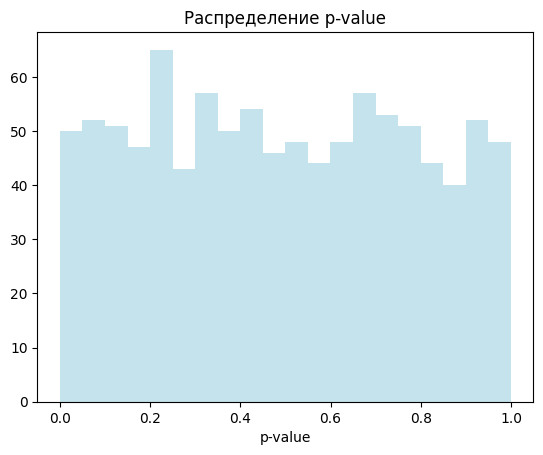

In [104]:
r = 1000
t_values = np.empty(r)
p_values = np.empty(r)

for i in range(r):
    n = np.random.uniform(low=400, high=2000, size=10000)
    m = np.random.uniform(low=400, high=2000, size=10000)
    t_values[i], p_values[i] = ttest_ind(n, m)

plt.hist(p_values, bins=20, color='lightblue', alpha=0.7)
plt.title('Распределение p-value')
plt.xlabel('p-value')
plt.show()

Мы получили равномерное распределение. Это и есть ожидаемый результат, так как А/А-тесты сравнивают две идентичные группы, нулевая гипотеза заведомо верна. 

## Задание 6: Мощность t-критерия. Построение кривых мощности.
Наблюдения в двух выборках взяты из нормальных распределений с sigma = 400. Матожидание первой выборки равно 1200, а матожидание второй выборки изменяется относительно первого с некоторым шагом. Постройте кривую мощности для изменения матожидания c шагом от 0,5% до 5%. 

___

In [95]:
step = 0.0001
power = []
n = np.random.normal(loc=1200, scale=400, size=100)
for i in range(0, 450):
    count = 0
    for j in range(100):
        m = np.random.normal(loc=1200 + (i * step + 0.005) * 1200, scale=400, size=100)
        t, p = ttest_ind(n, m)
        if p < 0.05:
            count += 1

    val = count / 100
    power.append(val)

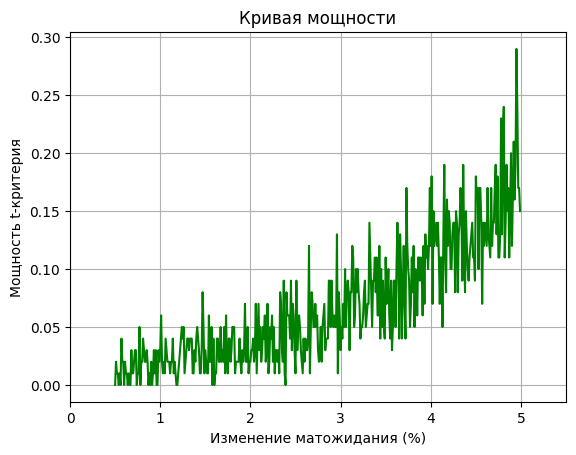

In [106]:

plt.plot(np.arange(0, 450) * step * 100 + 0.5, power, color='green')
plt.title('Кривая мощности')
plt.xlabel('Изменение матожидания (%)')
plt.ylabel('Мощность t-критерия')
plt.xlim(0, 5.5)
plt.grid()
plt.show()